<a href="https://colab.research.google.com/github/bikashmishraa/OpenCV_learning/blob/master/yolov8_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00


In [4]:
Root_dir = '/content/drive/My Drive/yolov8'

In [ ]:
import os
from ultralytics import YOLO

# Pre-trained YOLOv8n for faster training
model = YOLO('yolov8n.pt')


# Train the model
result = model.train(
    data=os.path.join(Root_dir, 'data.yaml'),
    epochs=15,           # fewer epochs needed for transfer learning
    batch=16,            # adjust according to GPU memory
    imgsz=320,           # smaller image size for faster training
    patience=3,          # early stopping if validation loss doesn't improve
    project='runs/train',
    name='wild_animal_detection',
    exist_ok=True        # overwrite previous run if exists
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/yolov8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou

In [13]:
model.save("/content/drive/My Drive/yolov8/savedTrainedModel")

In [10]:
!scp -r /content/runs '/content/drive/My Drive/yolov8'


image 1/1 /content/drive/My Drive/yolov8/train/images/wild_boar_predict3.jpg: 320x320 3 wild_boars, 97.0ms
Speed: 2.6ms preprocess, 97.0ms inference, 1.5ms postprocess per image at shape (1, 3, 320, 320)


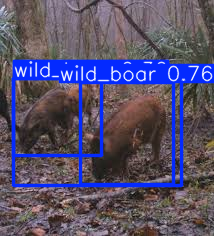

'results_wild_boar_predict3.jpg'

In [14]:
predict =model.predict( "/content/drive/My Drive/yolov8/train/images/wild_boar_predict3.jpg")
predict[0].show()
predict[0].save()